--- Starte Konvergenzanalyse ---
Preis bei N=  11 Schritten: 10.61120 €
Preis bei N=  21 Schritten: 10.53443 €
Preis bei N=  31 Schritten: 10.50730 €
Preis bei N=  41 Schritten: 10.49344 €
Preis bei N=  51 Schritten: 10.48502 €
Preis bei N=  61 Schritten: 10.47936 €
Preis bei N=  71 Schritten: 10.47530 €
Preis bei N=  81 Schritten: 10.47225 €
Preis bei N=  91 Schritten: 10.46987 €
Preis bei N= 101 Schritten: 10.46795 €
Preis bei N= 111 Schritten: 10.46639 €
Preis bei N= 121 Schritten: 10.46508 €
Preis bei N= 131 Schritten: 10.46397 €
Preis bei N= 141 Schritten: 10.46302 €
Preis bei N= 151 Schritten: 10.46220 €
Preis bei N= 161 Schritten: 10.46148 €
Preis bei N= 171 Schritten: 10.46084 €
Preis bei N= 181 Schritten: 10.46027 €
Preis bei N= 191 Schritten: 10.45976 €
Preis bei N= 201 Schritten: 10.45931 €

Black-Scholes Preis (Vergleich): 10.45058 €



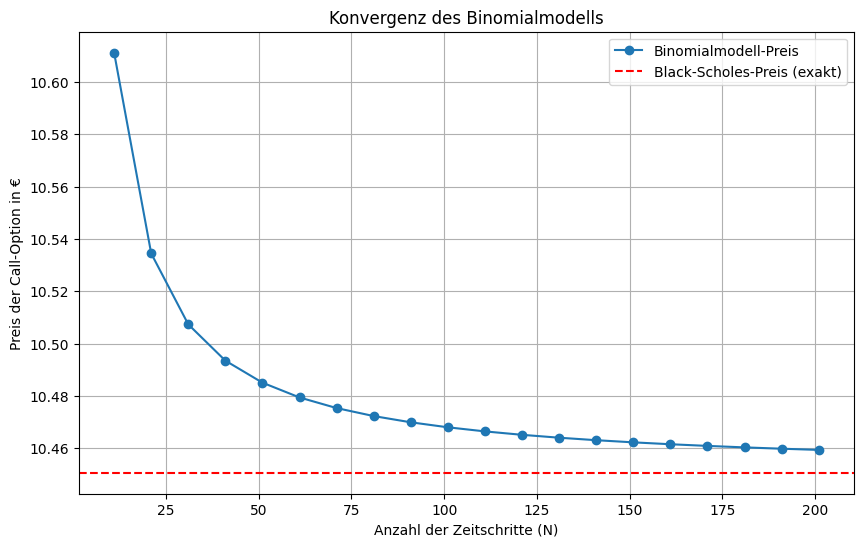

--- Berechne die Griechen (Delta & Gamma) ---
Delta: 0.6367
Gamma: 0.0188


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Black-Scholes Formel
#Hab ich aus dem Skript/Internet, um mein Ergebnis später zu checken.
#Ist sozusagen die "richtige" Antwort
def black_scholes_call(S, K, T, r, vol):
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return price

#Hauptfunktion für das Binomialmodell
def berechne_optionspreis(S, K, T, r, vol, steps, option_type='call'):


    # dt = die Länge von einem Zeitschritt
    dt = T / steps
    # u und d = Faktoren, um die die Aktie steigt oder fällt
    u = np.exp(vol * np.sqrt(dt))
    d = 1.0 / u
    # q = "risikoneutrale" Wahrscheinlichkeit für einen Anstieg
    q = (np.exp(r * dt) - d) / (u - d)
    end_kurse = np.zeros(steps + 1)
    for i in range(steps + 1):
        end_kurse[i] = S * (u**i) * (d**(steps - i))
    if option_type == 'call':
        payoff = np.maximum(0, end_kurse - K)
    else:
        payoff = np.maximum(0, K - end_kurse)
    for i in range(steps - 1, -1, -1):
        payoff = np.exp(-r * dt) * (q * payoff[1:] + (1 - q) * payoff[:-1])
    return payoff[0]


#Haupt-Teil
if __name__ == "__main__":

    stock_price = 100.0   # S_0: Aktueller Aktienkurs
    strike_price = 100.0  # K: Ausübungspreis
    time_to_maturity = 1.0 # T: Laufzeit in Jahren
    risk_free_rate = 0.05 # r: Risikofreier Zins (z.B. 5%)
    volatility = 0.20     # sigma: Volatilität (z.B. 20%)

    print("--- Starte Konvergenzanalyse ---")

    step_counts = range(11, 202, 10)
    binomial_results = []

    for n in step_counts:
        price = berechne_optionspreis(stock_price, strike_price, time_to_maturity, risk_free_rate, volatility, n)
        binomial_results.append(price)
        print(f"Preis bei N={n:4d} Schritten: {price:.5f} €")

    bs_price = black_scholes_call(stock_price, strike_price, time_to_maturity, risk_free_rate, volatility)
    print(f"\nBlack-Scholes Preis (Vergleich): {bs_price:.5f} €\n")

    #Plotten
    plt.figure(figsize=(10, 6))
    plt.plot(step_counts, binomial_results, marker='o', linestyle='-', label='Binomialmodell-Preis')
    plt.axhline(y=bs_price, color='r', linestyle='--', label='Black-Scholes-Preis (exakt)')
    plt.title('Konvergenz des Binomialmodells')
    plt.xlabel('Anzahl der Zeitschritte (N)')
    plt.ylabel('Preis der Call-Option in €')
    plt.grid(True)
    plt.legend()
    plt.show()

    #Griechen berechnen
    print("--- Berechne die Griechen (Delta & Gamma) ---")
    N_greeks = 200

    dt = time_to_maturity / N_greeks
    u = np.exp(volatility * np.sqrt(dt))
    d = 1.0 / u

    price_up = berechne_optionspreis(stock_price * u, strike_price, time_to_maturity - dt, risk_free_rate, volatility, N_greeks - 1)
    price_down = berechne_optionspreis(stock_price * d, strike_price, time_to_maturity - dt, risk_free_rate, volatility, N_greeks - 1)

    delta = (price_up - price_down) / (stock_price * u - stock_price * d)
    print(f"Delta: {delta:.4f}")

    price_uu = berechne_optionspreis(stock_price * u * u, strike_price, time_to_maturity - 2*dt, risk_free_rate, volatility, N_greeks - 2)
    price_ud = berechne_optionspreis(stock_price * u * d, strike_price, time_to_maturity - 2*dt, risk_free_rate, volatility, N_greeks - 2)
    delta_up = (price_uu - price_ud) / (stock_price * u * u - stock_price * u * d)

    price_dd = berechne_optionspreis(stock_price * d * d, strike_price, time_to_maturity - 2*dt, risk_free_rate, volatility, N_greeks - 2)
    delta_down = (price_ud - price_dd) / (stock_price * u * d - stock_price * d * d)

    gamma = (delta_up - delta_down) / (0.5 * (stock_price * u * u - stock_price * d * d))
    print(f"Gamma: {gamma:.4f}")